# Simulating dendrites

## Coincidence detection in the apical tree through calcium spike.

In this exercise we will see how coincident inputs at the dendrite and soma produce a supralinear response.

This exercise is based on [Schaefer et al. 2003](https://www.physiology.org/doi/full/10.1152/jn.00046.2003), with code modified from [ModelDB](https://senselab.med.yale.edu/modeldb/showmodel.cshtml?model=83344&file=%2FBACFiring%2FBACModel.hoc#tabs-1).

In [1]:
#@markdown # Install NEURON Simulator
!pip install neuron --quiet  # install neuron simulator

     |████████████████████████████████| 8.7MB 5.4MB/s 


In [2]:
#@markdown # Mount your gDrive
#@markdown ## Execute this cell!
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
import os
# change dir
os.chdir('/content/gdrive/MyDrive/CompNeuro_Dendrites_2021/BAC_model')

## Compile ion channel models (.mod files)

In [4]:
!nrnivmodl mechanisms/ # Compile NEURON model

/content/gdrive/MyDrive/CompNeuro_Dendrites_2021/BAC_model
Mod files: "mechanisms/cad2.mod" "mechanisms/childa.mod" "mechanisms/child.mod" "mechanisms/epsp.mod" "mechanisms/it2.mod" "mechanisms/kaprox.mod" "mechanisms/kca.mod" "mechanisms/km.mod" "mechanisms/kv.mod" "mechanisms/na.mod" "mechanisms/SlowCa.mod"

COBJS=''
 -> Compiling mod_func.c
x86_64-linux-gnu-gcc -O2   -I.   -I/usr/local/lib/python3.7/dist-packages/neuron/.data/include  -I/nrnwheel/openmpi/include -fPIC -c mod_func.c -o mod_func.o
 => LINKING shared library ./libnrnmech.so
x86_64-linux-gnu-g++ -O2 -DVERSION_INFO='7.8.2' -std=c++11 -shared -fPIC  -I /usr/local/lib/python3.7/dist-packages/neuron/.data/include -o ./libnrnmech.so -Wl,-soname,libnrnmech.so \
  ./mod_func.o ./cad2.o ./childa.o ./child.o ./epsp.o ./it2.o ./kaprox.o ./kca.o ./km.o ./kv.o ./na.o ./SlowCa.o  -L/usr/local/lib/python3.7/dist-packages/neuron/.data/lib -lnrniv -Wl,-rpath,/usr/local/lib/python3.7/dist-packages/neuron/.data/lib   
rm -f ./.libs/libnr

In [5]:
#@markdown ## Make nice plots!
from matplotlib import pyplot as plt
import matplotlib as mpl
plt.rcParams.update({
    "font.size": 18,
    })

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['ytick.major.width'] = 3
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['ytick.major.size'] = 7
mpl.rcParams['xtick.major.size'] = 7

## Import NEURON simulator and define some parameters

In [6]:
from neuron import h, gui
h.tstop=1100
h.steps_per_ms = 40
h.dt = 0.025

In [7]:
h.xopen("morphology.nrn")
h.xopen("Model_specification.hoc")

	1 


1.0

In [9]:
#@markdown ## Create sections
for sec in h.allsec():
  if (h.nseg < h.L / 20):
    h.nseg = int(h.L / 20 + 1)

h.create_axon() 
h.init_cell()

0.0

In [10]:
# Create a current Clamp procedure called "IatSoma" starting at 1005.1 ms
# and with duration=5ms. Amplitude is an argument.     
ic = h.IClamp(h.somaA(0.5))
ic.delay = 1005.1  # ms
ic.dur = 5         # ms
ic.amp = 1.8       # nA

In [20]:
# Include an EPSP
# EPSP : f(t) = (1-exp(-t/chi1)) * exp(-t/chi2) 
#       mit chi1 = 0.5 -2 ms und chi2 = 2-8 ms

syn = h.epsp(h.mbSec.sec(0))
   
syn.tau0 = 0.8      # ms
syn.tau1 = 4        # ms
syn.onset = 1007.1  # ms
syn.imax = 0.0      # 0.6, # nA

In [21]:
vsoma_vec = h.Vector()   # Membrane potential vector
vdend1_vec = h.Vector()  # Membrane potential vector
t_vec = h.Vector()       # Time stamp vector
vsoma_vec.record(h.somaA(0.5)._ref_v)
vdend1_vec.record(h.mbSec.sec(0.5)._ref_v)
t_vec.record(h._ref_t)

Vector[11]

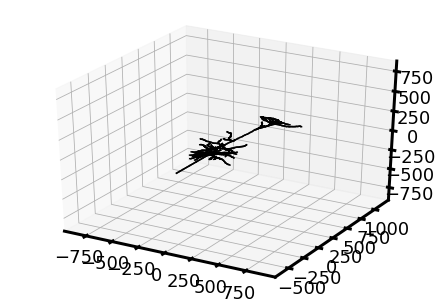

In [22]:
sh1 = h.PlotShape(False)
sh1.plot(plt)
plt.show()

Text(0, 0.5, 'voltage (mV)')

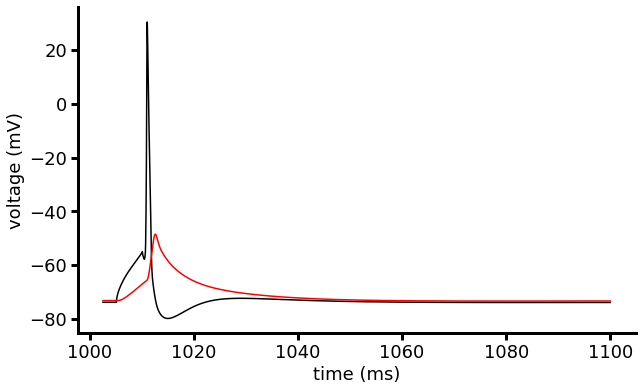

In [23]:
h.init()
h.run()

# remove the first 20 ms
vsoma_vec.remove(0, 200)
vdend1_vec.remove(0, 200)
t_vec.remove(0, 200)

# Make the plot
plt.figure(figsize=(10, 6))
plt.plot(t_vec, vsoma_vec, color='black', label='soma')
plt.plot(t_vec, vdend1_vec, color='red', label='dend')
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')